## The Competition is use machine learning to create the model that predicts which passengers survived the Titanic ship

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [94]:
train=pd.read_csv(r"C:\Users\User\Downloads\Titanic - Machine Learning from Disaster\train.csv")
test=pd.read_csv(r"C:\Users\User\Downloads\Titanic - Machine Learning from Disaster\test.csv")

## 1-Explor Data

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S


In [29]:
train.shape

(891, 12)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
nu=train.isnull().sum()
nu[nu>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

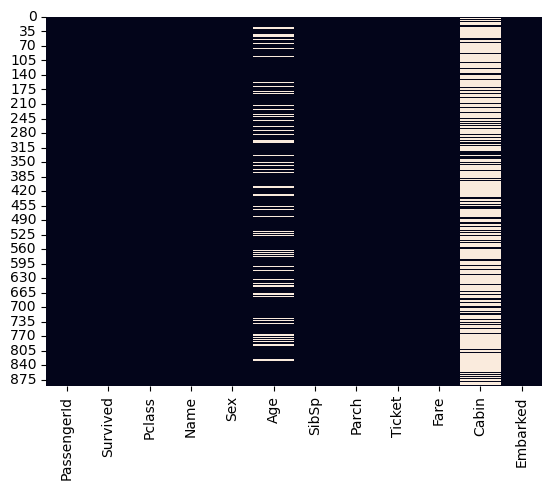

In [51]:
sns.heatmap(train.isnull(), cbar=False)

## 1-Clean Data

In [96]:
def clean(d):
   d.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'Fare'], axis=1, inplace=True)
   d.Age=d.Age.fillna(d.Age.median)
   d.dropna()
   return d

In [98]:
clean(train)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,<bound method Series.median of 0 22.0\n1 ...,1,2
889,890,1,1,male,26.0,0,0


In [100]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,<bound method Series.median of 0 34.5\n1 ...,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,<bound method Series.median of 0 34.5\n1 ...,0,0


<Axes: >

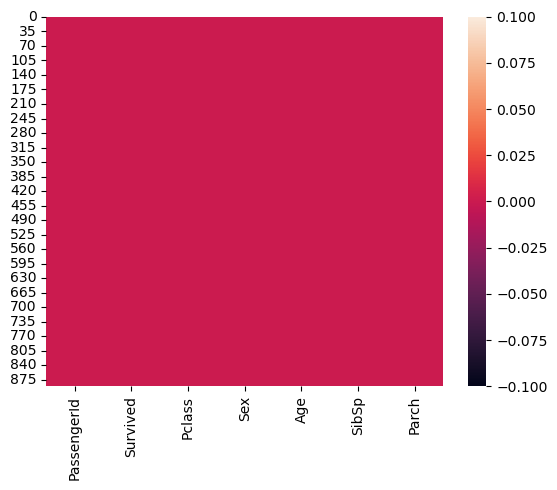

In [108]:

sns.heatmap(train.isnull())

## 3-Data Analysis

In [157]:
numeric_data = train.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass     SibSp     Parch
PassengerId     1.000000 -0.005007 -0.035144 -0.057527 -0.001652
Survived       -0.005007  1.000000 -0.338481 -0.035322  0.081629
Pclass         -0.035144 -0.338481  1.000000  0.083081  0.018443
SibSp          -0.057527 -0.035322  0.083081  1.000000  0.414838
Parch          -0.001652  0.081629  0.018443  0.414838  1.000000


<Axes: >

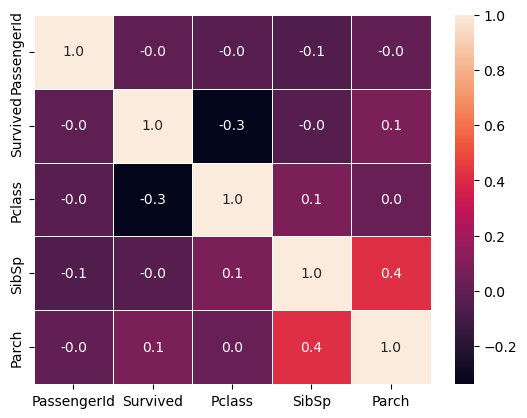

In [165]:
sns.heatmap(correlation_matrix,annot=True,fmt='.1f',linewidths=.5)

In [167]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [171]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

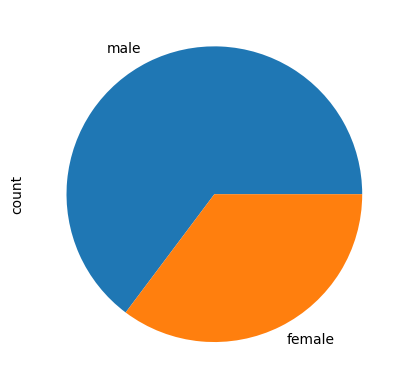

In [175]:
train.Sex.value_counts().plot.pie()